In [1]:
import yaml
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics.cluster import completeness_score
from sklearn.metrics.cluster import mutual_info_score
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_mutual_info_score
from sklearn.metrics.cluster import fowlkes_mallows_score
cmetric = mutual_info_score
from sklearn.metrics import confusion_matrix

In [2]:
pred_communities = np.load("../results/Epen1/p95/pred_communities.npy").astype(int)
with open("../data/cell-type-specific/Epen1-networks/adj/p95/msdyn_nw_details.yaml", "r") as outfile:
    msdyn_nw_details = yaml.load(outfile, Loader=yaml.SafeLoader)

In [3]:
donor_idx_keys = sorted(msdyn_nw_details["donor_indices"].keys())

In [4]:
pred_communities.shape

(8, 2, 2475)

In [5]:
uniq, uniq_counts = np.unique(pred_communities[0,0,:], return_counts=True)

for i in range(pred_communities.shape[0]):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(32,8))
    axes[0].set_title("time step 1")
    axes[1].set_title("time step 2")
    axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation = 90)
    axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation = 90)
    sns.countplot(pred_communities[i,0,:], palette="tab20", ax=axes[0])
    sns.countplot(pred_communities[i,1,:], palette="tab20", ax=axes[1])
    donor_name = msdyn_nw_details["donor_indices"][donor_idx_keys[i]]
    plt.suptitle(f"Subject-{donor_name}")

In [6]:
sum_t = 0
for i in range(pred_communities.shape[0]):
    ari = cmetric(pred_communities[i,0,:],pred_communities[i,1,:])
    donor_name = msdyn_nw_details["donor_indices"][donor_idx_keys[i]]
    print(f"ARI of time step 1 and time step 2 for {donor_name} is {round(ari,3)}")
    sum_t += ari

ARI of time step 1 and time step 2 for HPSI0114i-eipl_1 is 0.626
ARI of time step 1 and time step 2 for HPSI0115i-aoxv_1 is 0.528
ARI of time step 1 and time step 2 for HPSI0115i-timk_4 is 0.629
ARI of time step 1 and time step 2 for HPSI0414i-mita_1 is 0.705
ARI of time step 1 and time step 2 for HPSI0514i-fiaj_1 is 0.687
ARI of time step 1 and time step 2 for HPSI0714i-keui_4 is 0.557
ARI of time step 1 and time step 2 for HPSI0715i-aowh_2 is 0.537
ARI of time step 1 and time step 2 for HPSI1013i-hiaf_1 is 0.575


In [7]:
sum_t/pred_communities.shape[0]

0.605462295454815

In [9]:
sum1 = 0
sum2 = 0
measure_sbj_dict = {}
for i in range(pred_communities.shape[0]):
    donor_name_i = msdyn_nw_details["donor_indices"][donor_idx_keys[i]]
    measure_sbj_dict[donor_name_i] = {}
    
    for j in range(pred_communities.shape[0]):
        ari1 = cmetric(pred_communities[i,0,:],pred_communities[j,0,:])
        donor_name_j = msdyn_nw_details["donor_indices"][donor_idx_keys[j]]
        #print(f"ARI of {donor_name_i} and {donor_name_j} is {round(ari1,3)} at time step 1")
        ari2 = cmetric(pred_communities[i,1,:],pred_communities[j,1,:])
        #print(f"ARI of {donor_name_i} and {donor_name_j} is {round(ari2,3)} at time step 2")
        if i!=j:
            sum1 += ari1
            sum2 += ari2
            measure_sbj_dict[donor_name_i][donor_name_j] = {1: ari1, 2:ari2}

In [10]:
low_diff = ["HPSI0714i-keui_4", "HPSI0514i-fiaj_1", "HPSI0115i-timk_4", "HPSI0114i-eipl_1"]
high_diff = ["HPSI0715i-aowh_2", "HPSI1013i-hiaf_1", "HPSI0115i-aoxv_1"]

In [11]:
print("FOR LOW, both time step:\n")
sum_all_high = 0
sum_all_low = 0

low_low_dict = {}
low_high_dict = {}
for low_key_i in low_diff:
    sum_low = 0
    for low_key_j in low_diff:
        if low_key_j != low_key_i:
            sum_low += (measure_sbj_dict[low_key_i][low_key_j][1] + measure_sbj_dict[low_key_i][low_key_j][2]) / (len(2*low_diff)  -2)
    print("low:", low_key_i, sum_low)
    low_low_dict[low_key_i] = sum_low
    sum_all_low += sum_low
    sum_high = 0
    for high_key_j in high_diff:
        sum_high += (measure_sbj_dict[low_key_i][high_key_j][1] + measure_sbj_dict[low_key_i][high_key_j][2]) / len(2*high_diff)
    print("high:", low_key_i, sum_high)
    low_high_dict[low_key_i] = sum_high
    sum_all_high += sum_high
    print("\n")
print("AVG LOW:", sum_all_low/len(low_diff))
print("AVG HIGH:", sum_all_high/len(low_diff))

FOR LOW, both time step:

low: HPSI0714i-keui_4 0.7320587888416253
high: HPSI0714i-keui_4 0.6117928076801781


low: HPSI0514i-fiaj_1 0.7779282986256918
high: HPSI0514i-fiaj_1 0.6312742735440886


low: HPSI0115i-timk_4 0.7744045948958217
high: HPSI0115i-timk_4 0.6665193271474503


low: HPSI0114i-eipl_1 0.7016751045441405
high: HPSI0114i-eipl_1 0.5683151451166544


AVG LOW: 0.7465166967268198
AVG HIGH: 0.6194753883720929


In [12]:
print("FOR LOW, time step 1:\n")
sum_all_high = 0
sum_all_low = 0
for low_key_i in low_diff:
    sum_low = 0
    for low_key_j in low_diff:
        if low_key_j != low_key_i:
            sum_low += (measure_sbj_dict[low_key_i][low_key_j][1]) / (len(low_diff)-1)
    print("low:", low_key_i, sum_low)
    sum_all_low += sum_low
    sum_high = 0
    for high_key_j in high_diff:
        sum_high += (measure_sbj_dict[low_key_i][high_key_j][1]) / len(high_diff)
    print("high:", low_key_i, sum_high)
    sum_all_high += sum_high
    print("\n")
print("AVG LOW:", sum_all_low/len(low_diff))
print("AVG HIGH:", sum_all_high/len(low_diff))

FOR LOW, time step 1:

low: HPSI0714i-keui_4 0.7067559538557533
high: HPSI0714i-keui_4 0.5919228643815309


low: HPSI0514i-fiaj_1 0.7256967184233634
high: HPSI0514i-fiaj_1 0.618357049118847


low: HPSI0115i-timk_4 0.7958418192580058
high: HPSI0115i-timk_4 0.7122105840085946


low: HPSI0114i-eipl_1 0.7217429949603349
high: HPSI0114i-eipl_1 0.6087758150629198


AVG LOW: 0.7375093716243644
AVG HIGH: 0.6328165781429731


In [13]:
print("FOR LOW, time step 2:\n")
sum_all_high = 0
sum_all_low = 0
for low_key_i in low_diff:
    sum_low = 0
    for low_key_j in low_diff:
        if low_key_j != low_key_i:
            sum_low += (measure_sbj_dict[low_key_i][low_key_j][2]) / (len(low_diff)  -1)
    print("low:", low_key_i, sum_low)
    sum_all_low += sum_low
    sum_high = 0
    for high_key_j in high_diff:
        sum_high += (measure_sbj_dict[low_key_i][high_key_j][2]) / len(high_diff)
    print("high:", low_key_i, sum_high)
    sum_all_high += sum_high
    print("\n")
print("AVG LOW:", sum_all_low/len(low_diff))
print("AVG HIGH:", sum_all_high/len(low_diff))

FOR LOW, time step 2:

low: HPSI0714i-keui_4 0.7573616238274973
high: HPSI0714i-keui_4 0.6316627509788254


low: HPSI0514i-fiaj_1 0.8301598788280202
high: HPSI0514i-fiaj_1 0.6441914979693302


low: HPSI0115i-timk_4 0.7529673705336376
high: HPSI0115i-timk_4 0.620828070286306


low: HPSI0114i-eipl_1 0.681607214127946
high: HPSI0114i-eipl_1 0.5278544751703891


AVG LOW: 0.7555240218292752
AVG HIGH: 0.6061341986012128


In [14]:
print("FOR HIGH, both time step:\n")
sum_all_high = 0
sum_all_low = 0
high_high_dict = {}
high_low_dict = {}
for high_key_i in high_diff:
    sum_low = 0
    for low_key_j in low_diff:
        sum_low += (measure_sbj_dict[high_key_i][low_key_j][1] + measure_sbj_dict[high_key_i][low_key_j][2]) / len(2*low_diff)  
    print("low:", low_key_i, sum_low)
    sum_all_low += sum_low
    sum_high = 0
    for high_key_j in high_diff:
        if high_key_i != high_key_j:
            sum_high += (measure_sbj_dict[high_key_i][high_key_j][1] + measure_sbj_dict[high_key_i][high_key_j][2]) / (len(2*high_diff) -2 )
    print("high:", low_key_i, sum_high)
    high_high_dict[high_key_i] = sum_high

    high_low_dict[high_key_i] = sum_low
    sum_all_high += sum_high
    print("\n")    
print("AVG LOW:", sum_all_low/len(high_diff))
print("AVG HIGH:", sum_all_high/len(high_diff))

FOR HIGH, both time step:

low: HPSI0114i-eipl_1 0.6063892083142827
high: HPSI0114i-eipl_1 0.7007436769353502


low: HPSI0114i-eipl_1 0.6176118641977177
high: HPSI0114i-eipl_1 0.6774577715390029


low: HPSI0114i-eipl_1 0.6344250926042783
high: HPSI0114i-eipl_1 0.7117834728618443


AVG LOW: 0.6194753883720928
AVG HIGH: 0.6966616404453991


In [15]:
print("FOR HIGH, time step 1:\n")
sum_all_high = 0
sum_all_low = 0
for high_key_i in high_diff:
    sum_low = 0
    for low_key_j in low_diff:
        sum_low += (measure_sbj_dict[high_key_i][low_key_j][1]) / len(low_diff)  
    print("low:", low_key_i, sum_low)
    sum_all_low += sum_low
    sum_high = 0
    for high_key_j in high_diff:
        if high_key_i != high_key_j:
            sum_high += (measure_sbj_dict[high_key_i][high_key_j][1]) / (len(high_diff)-1)
    print("high:", low_key_i, sum_high)
    sum_all_high += sum_high
    print("\n")
print("AVG LOW:", sum_all_low/len(high_diff))
print("AVG HIGH:", sum_all_high/len(high_diff))

FOR HIGH, time step 1:

low: HPSI0114i-eipl_1 0.5938164428020497
high: HPSI0114i-eipl_1 0.6707687685224859


low: HPSI0114i-eipl_1 0.6625415019087345
high: HPSI0114i-eipl_1 0.6928016599134373


low: HPSI0114i-eipl_1 0.6420917897181351
high: HPSI0114i-eipl_1 0.6883298387762726


AVG LOW: 0.6328165781429731
AVG HIGH: 0.6839667557373987


In [16]:
print("FOR HIGH, time step 2:\n")
sum_all_high = 0
sum_all_low = 0
for high_key_i in high_diff:
    sum_low = 0
    for low_key_j in low_diff:
        sum_low += (measure_sbj_dict[high_key_i][low_key_j][2]) / len(low_diff)  
    print("low:", high_key_i, sum_low)
    sum_all_low += sum_low
    sum_high = 0
    for high_key_j in high_diff:
        if high_key_i != high_key_j:
            sum_high += (measure_sbj_dict[high_key_i][high_key_j][2]) / (len(high_diff)-1)
    print("high:", high_key_i, sum_high)
    sum_all_high += sum_high
    print("\n")
print("AVG LOW:", sum_all_low/len(high_diff))
print("AVG HIGH:", sum_all_high/len(high_diff))

FOR HIGH, time step 2:

low: HPSI0715i-aowh_2 0.6189619738265155
high: HPSI0715i-aowh_2 0.7307185853482145


low: HPSI1013i-hiaf_1 0.572682226486701
high: HPSI1013i-hiaf_1 0.6621138831645684


low: HPSI0115i-aoxv_1 0.6267583954904214
high: HPSI0115i-aoxv_1 0.735237106947416


AVG LOW: 0.6061341986012126
AVG HIGH: 0.7093565251533996


In [17]:
measure_sbj_dict["HPSI0114i-eipl_1"]

{'HPSI0115i-aoxv_1': {1: 0.6166291770955523, 2: 0.5208979380850871},
 'HPSI0115i-timk_4': {1: 0.7979764238642169, 2: 0.6408009614313117},
 'HPSI0414i-mita_1': {1: 0.7145422931919179, 2: 0.6087982536200944},
 'HPSI0514i-fiaj_1': {1: 0.6897883271957128, 2: 0.7578212704469699},
 'HPSI0714i-keui_4': {1: 0.677464233821075, 2: 0.6461994105055564},
 'HPSI0715i-aowh_2': {1: 0.5564691654654516, 2: 0.5322263366512398},
 'HPSI1013i-hiaf_1': {1: 0.6532291026277554, 2: 0.5304391507748405}}

In [18]:
sum_measure_dict = {}
all_sum1 = 0
all_sum2 = 0
for key, values in measure_sbj_dict.items():
    sum1 = 0
    sum2 = 0
    for val in values.values():
        sum1 += val[1]
        sum2 += val[2]
    all_sum1 += sum1
    all_sum2 += sum2
    sum_measure_dict[key] = {1: sum1, 2:sum2}    
sum_measure_dict

{'HPSI0114i-eipl_1': {1: 4.706098723261682, 2: 4.2371833215151},
 'HPSI0115i-aoxv_1': {1: 4.701767527735956, 2: 4.767027334515065},
 'HPSI0115i-timk_4': {1: 5.392921327467452, 2: 4.823765381042929},
 'HPSI0414i-mita_1': {1: 5.494133712854343, 2: 4.957690145795134},
 'HPSI0514i-fiaj_1': {1: 4.769834836865029, 2: 5.137960404366291},
 'HPSI0714i-keui_4': {1: 4.637211937841468, 2: 4.850977952153395},
 'HPSI0715i-aowh_2': {1: 4.475701906570575, 2: 4.706189955058958},
 'HPSI1013i-hiaf_1': {1: 4.9521083224603, 2: 4.304233976444202}}

In [19]:
(all_sum1+all_sum2)/(2*(pred_communities.shape[0]*(pred_communities.shape[0]-1)))

0.6867393461245346

In [20]:
high_high_dict
high_low_dict
low_low_dict
low_high_dict

{'HPSI0714i-keui_4': 0.6117928076801781,
 'HPSI0514i-fiaj_1': 0.6312742735440886,
 'HPSI0115i-timk_4': 0.6665193271474503,
 'HPSI0114i-eipl_1': 0.5683151451166544}

In [21]:
low_low_dict

{'HPSI0714i-keui_4': 0.7320587888416253,
 'HPSI0514i-fiaj_1': 0.7779282986256918,
 'HPSI0115i-timk_4': 0.7744045948958217,
 'HPSI0114i-eipl_1': 0.7016751045441405}

In [22]:
high_low_dict

{'HPSI0715i-aowh_2': 0.6063892083142827,
 'HPSI1013i-hiaf_1': 0.6176118641977177,
 'HPSI0115i-aoxv_1': 0.6344250926042783}

In [23]:
high_high_dict

{'HPSI0715i-aowh_2': 0.7007436769353502,
 'HPSI1013i-hiaf_1': 0.6774577715390029,
 'HPSI0115i-aoxv_1': 0.7117834728618443}

In [24]:
import numpy as np
import pandas as pd

In [25]:
all_values = {"name":[], "type":[], "val":[]}
for name, val in high_low_dict.items():
    all_values["name"].append( name)
    all_values["type"].append("high_to_low")
    all_values["val"].append(val) 
for name, val in low_high_dict.items():
    all_values["name"].append(name)
    all_values["type"].append("high_to_low")
    all_values["val"].append(val)
for name, val in low_low_dict.items():
    all_values["name"].append(name)
    all_values["type"].append("low_to_low")
    all_values["val"].append(val)
for name, val in high_high_dict.items():
    all_values["name"].append(name)
    all_values["type"].append("high_to_high")
    all_values["val"].append(val)


In [26]:
all_values

{'name': ['HPSI0715i-aowh_2',
  'HPSI1013i-hiaf_1',
  'HPSI0115i-aoxv_1',
  'HPSI0714i-keui_4',
  'HPSI0514i-fiaj_1',
  'HPSI0115i-timk_4',
  'HPSI0114i-eipl_1',
  'HPSI0714i-keui_4',
  'HPSI0514i-fiaj_1',
  'HPSI0115i-timk_4',
  'HPSI0114i-eipl_1',
  'HPSI0715i-aowh_2',
  'HPSI1013i-hiaf_1',
  'HPSI0115i-aoxv_1'],
 'type': ['high_to_low',
  'high_to_low',
  'high_to_low',
  'high_to_low',
  'high_to_low',
  'high_to_low',
  'high_to_low',
  'low_to_low',
  'low_to_low',
  'low_to_low',
  'low_to_low',
  'high_to_high',
  'high_to_high',
  'high_to_high'],
 'val': [0.6063892083142827,
  0.6176118641977177,
  0.6344250926042783,
  0.6117928076801781,
  0.6312742735440886,
  0.6665193271474503,
  0.5683151451166544,
  0.7320587888416253,
  0.7779282986256918,
  0.7744045948958217,
  0.7016751045441405,
  0.7007436769353502,
  0.6774577715390029,
  0.7117834728618443]}

In [27]:
all_val = pd.DataFrame.from_dict(all_values)

In [28]:
me_val = all_val.groupby(by=["type"])["val"].median().iloc[::-1]
order = pd.Index(['low_to_low', 'high_to_high', 'high_to_low'], dtype='object', name='type')

In [29]:
me_val

type
low_to_low      0.753232
high_to_low     0.617612
high_to_high    0.700744
Name: val, dtype: float64

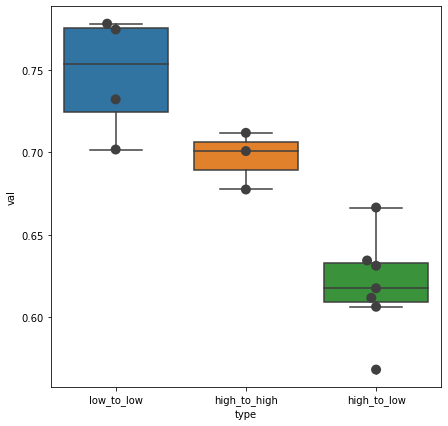

In [30]:
fig, ax = plt.subplots(figsize=(7,7))
ax = sns.boxplot(x="type", y="val", data=all_val, ax=ax, order=order)
ax = sns.swarmplot(x="type", y="val", data=all_val, color=".25", ax=ax, size=10, order=order)

In [31]:
import tikzplotlib
tikzplotlib.clean_figure()
print(tikzplotlib.get_tikz_code(figure=fig))

% This file was created by tikzplotlib v0.9.8.
\begin{tikzpicture}

\definecolor{color0}{rgb}{0.194607843137255,0.453431372549019,0.632843137254902}
\definecolor{color1}{rgb}{0.881862745098039,0.505392156862745,0.173039215686275}
\definecolor{color2}{rgb}{0.229411764705882,0.570588235294118,0.229411764705882}

\begin{axis}[
tick align=outside,
tick pos=left,
x grid style={white!69.0196078431373!black},
xlabel={type},
xmin=-0.5, xmax=2.5,
xtick style={color=black},
xtick={0,1,2},
xticklabels={low\_to\_low,high\_to\_high,high\_to\_low},
y grid style={white!69.0196078431373!black},
ylabel={val},
ymin=0.557834487441202, ymax=0.788408956301144,
ytick style={color=black},
ytick={0.55,0.6,0.65,0.7,0.75,0.8},
yticklabels={0.55,0.60,0.65,0.70,0.75,0.80}
]
\path [draw=white!23.921568627451!black, fill=color0, semithick]
(axis cs:-0.4,0.724462867767254)
--(axis cs:0.4,0.724462867767254)
--(axis cs:0.4,0.775285520828289)
--(axis cs:-0.4,0.775285520828289)
--(axis cs:-0.4,0.724462867767254)
--cycle

<Figure size 432x288 with 0 Axes>